<a href="https://colab.research.google.com/github/hridog00/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Helena Ridocci Gutierrez  <br>
Url: https://github.com/hridog00/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/SEMINARIO/Seminario_Algoritmos.ipynb<br>
Url colab: https://colab.research.google.com/drive/1__yudLEKcstPVA_pa18i_Hi3TDcjJYn4


Problema:
>2. Organizar los horarios de partidos de La Liga<br>


Descripción del problema:

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos
de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice
la audiencia.

Los horarios disponibles se conocen a priori y son los siguientes:
- Viernes 20
- Sábado 12,16,18,20
- Domingo 12,16,18,20
- Lunes 20

En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores (que tiene relación directa con la audiencia). Hay 4 equipos en la categoría A, 10 equipos de categoría B y 6 equipos de categoría C.

Se conoce estadisticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla (consultar tabla)

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes.

Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias: (consultar tabla)

(*) La respuesta es obligatoria
                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




*Respuesta*

El numero de posibilidades sin tener en cuenta las restricciones (que deba haber un partido los viernes y los lunes) lo he calculado de la siguiente manera:
1º: Calculo el numero de posibilidades de combinacion de equipos para una jornada. Para calcular esto, hago uso de la siguiente formula:

$\frac{(2n)!}{2^n n!}$ siendo $n = nºequipos/2$

2º: Calculo la posible distribucion de esos equipos en funcion del numero de franjas horarias. Para calcular eso, utilizo la siguiente formula:
$n^h$ siendo $h$ el numero de franjas horarias disponibles.

Por lo tanto, la formula final queda así:
$\frac{(2n)!}{2^n n!} n^h$ 



In [4]:
import math
equipos = 20
horas =  10
n = equipos/2
partidos = math.factorial(2*n)/(2**n * math.factorial(n))
total = (n**horas) * partidos
print("El numero total de posibilidades es de",total)

El numero total de posibilidades es de 6.54729075e+18


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


*Respuesta*

Teniendo en cuenta el algoritmo utilizado para la resolucion del problema, asi como los mecanismos empleados, se ha utilizado la siguientes estrucutra de datos: 

Los equipos vienen etiquedaso segun su categoria y un numero. Los partidos estan codificados en forma de set de dos elementos. Se ha creado una lista con tantos elementos como franjas horarias. Cada uno de sus elementos es una lista que contiene los partidos jugados a esa hora. Si no se juega a esa hora ningun partido, la lista estará vacía.

Se ha elegido esta estructura porque me daba mucha facilidad para acceder a los partidos en funcion de la hora, controlar los partidos que habia a cada hora, etc. Además, el lenguaje de programacion utilizado da muchas facilidades a la hora de trabajar con listas.

Respecto a las estructuras de datos para contener los datos del problema, se han utilizado las siguientes:
- Para determinar la audiencia en función de la categoria de los equipos, se ha utilizado un diccionario.
- Para determinar el porcentaje de audiencia en funcion de la hora, una lista, donde cada elemento indica el porcentaje de audiencia que tendria la franja horaria en esa psocion de la lista. El primer elemento corresponderia a la primera franja horaria disponible y el último a la ultima.
- Para determinar la reduccion de audiencia en funcion de las coincidencias, se ha utilizado una lista, donde el primer elemento indica si hay un equipo en esa franja, el segundo si hay dos, etc...

In [0]:
equipos = ["A1", "A2", "A3", "A4", "B1", "B2", "B3", "B4", "B5", 
           "B6","B7", "B8", "B9", "B10","C1", "C2", "C3", "C4", "C5", "C6"]
 audiencia_max = {'AA': 2,
    'AB': 1.3,
    'AC': 1,
    'BB': 0.9,
    'BC': 0.75,
    'CC': 0.47}
    
audiencia_percent = [0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75,0.5, 1, 0.4]
coincidencias = [0, 0.25, 0.45, 0.60, 0.70, 0.75, 0.78, 0.8, 0.8]

solucion = [[('B9', 'B7'), ('B3', 'C3')],
 [],
 [('C4', 'B1'), ('B6', 'C2'), ('C6', 'A3')],
 [('A2', 'B8')],
 [('B5', 'A1')],
 [],
 [('C5', 'B2')],
 [],
 [('B10', 'B4')],
 [('A4', 'C1')]]



Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

*Respuesta*

La funcion objetivo busca determinar la audiencia dada una determinada solucion, haciendo uso de las estrucutras explicadas en la celda sueprior. Se calcula la audiendia que se obtiene en cada partido, teniendo en cuenta la categoría de los equipos, la franja horaria y cuanqos equipos coinciden en ella y se suman, obteniendo asi la audiencia total de la jornada.

Es un problema de maximizacion.

In [0]:
def get_fitness(indiv):
    '''
    Evalúa a cada individuo. 
    Tiene en cuenta todos los aspectos que se mencionaron en la primera celda de este Notebook: 
    categoria de los equipos, hora a la que juegan y numero de coincidencias.
    Si no hay individuo en la primera o la última franja horaria, el fitness del individuo es cero, 
    ya que no se cumple una condicón del problema por lo que la solcion condificada por el individuos no es válida. 
    '''
    fitness = 0
    for hora, i in enumerate(indiv):
        if len(i) > 0:
            for match in i:
                tipo = ''.join(sorted( match[0][0] + match[1][0]))
                audience = audiencia_max[tipo] * audiencia_percent[hora]
                audience -= audience*coincidencias[len(i)-1]
                fitness += audience
    if (len(indiv[0]) == 0 or len(indiv[-1]) == 0 ):
        fitness = 0
    return fitness 

Diseña un algoritmo para resolver el problema por fuerza bruta

*Respuesta*

Resolver este problema por fuerza bruta tiene un coste computacional muy elevado. Sin embargo, se ha planteado como podría ser el algoritmo que lo resolviera, así como las principales funciones que serian necesarias.



```
combinaciones_partidos = obtenerPartidos(n_equipos)
combinaciones_horas = obtenerHoras(n_equipos, n_horas)

mejor_apt = 0
mejor_solucion = None

for horas in combinaciones_horas:
    for partidos in combinaciones_partidos:
        solucion = crear_solucion(horas, partidos)
        aptitud = get_fitness(solucion)
        if aptitud > mejor_apt:
            mejor_apt = aptitud
            mejor_solucion = solucion

```
A continuacion, se muestran las funciones que se implementaron para el algoritmo descrito. Para poder ejecutarlo, es recomendable modificar las estructuras de datos en las que se recogen los parametros del problema con el objetivo de reducir el problema, reduciendo el numero de equipos y el numero de horas.


In [0]:
import itertools

def dele_duplicates(total): #elimina combinaciones repetidas
    tipos = []
    res = []
    for i in range(len(total)):
        if ''.join(sorted(total[i])) not in tipos:
            res.append(total[i])
            tipos.append(''.join(sorted(total[i])))
    return res
'''
Funciones para crear los posibles partidos
'''
def crear_hijos_partidos(sol, partidos, i):
    res = []

    for p in partidos:
        sol1 = sol[:]
        sol1[i] = ''.join(p)
        res.append(sol1)
    return res

def obtener_equipos(n):
    alph = 'abcdefghijklmnopqrstuvwxyz'
    equipos = [alph[i] for i in range(0, n)]
    posibles = list(itertools.permutations(equipos, 2))
    posibles = list(set([''.join(sorted(p)) for p in posibles]))
    sol = []

    for p in posibles:
        pos = ['']*(n//2)
        pos[0] = ''.join(p)
        sol.append(pos)
    sol = sorted(sol)[:n-1]  
    for i in range(1, n//2):
        nuevas = []
        for s in sol:
            p_usados = ''.join(s)
            p_restantes = [p for p in equipos if p not in p_usados]
            posibles = list(itertools.permutations(p_restantes, 2))
            posibles = list(set([''.join(sorted(p)) for p in posibles]))
            nuevas  = nuevas + crear_hijos_partidos(s, posibles, i)
        sol = nuevas[:]
    sol = dele_duplicates(sol)
    return sol
'''
Funciones para crear los posibles horarios
'''
def crear_hijos(sol, partidos, horas):
    res = []
    for h in horas:
        for p in partidos:
            sol1 = sol[:]
            sol1[h-1] = ''.join(sorted(sol[h-1]+p))
            res.append(sol1)
    return res

def obtener_horas(n,h):
    n = n//2
    p = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    sol = []
    horas = [i for i in range(1,h+1)]
    partidos = p[:n]
    for h in horas:
        for p in partidos:
            pos = ['']*len(partidos)
            pos[h-1] = p
            sol.append(pos)
    start = len(sol)
    end = 0
    while  start!=end:
        start = len(sol)
        nuevas = sol[:]
        for s in sol:
            p_usados = ''.join(s)
            p_restantes = [p for p in partidos if p not in p_usados]
            if len(p_restantes) > 0:
                hijos = crear_hijos(s, p_restantes, horas)
                nuevas  = nuevas + hijos
        nuevas.sort()
        nuevas = list(nuevas for nuevas,_ in itertools.groupby(nuevas))
        end = len(nuevas)
        sol = nuevas[:]
    resultado = [el for el in nuevas if sum(len(n) for n in el) == len(partidos)]
    return resultado

n_equipos = 4
n_horas = 2
combinaciones_partidos = obtener_equipos(n_equipos)
combinaciones_horas = obtener_horas(n_equipos,n_horas)

def rename_equipos(categorias):
    equipos =  'abcdefghijklmnopqrstuvwxyz'
    transform = {}
    for i in range(len(categorias)):
        transform[equipos[i]] = categorias[i]
    return transform

#el parametro equipos es el definido en preguntas anteriores
def crear_solucion(partidos, horario, equipos):
    nombres = rename_equipos(nombres)
    p = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    prueba = {}
    for i in range(len(partidos)):
        prueba[p[i]] = partidos[i]
    solucion = []
    
    for h in horario:
        match = []
        for a in h:
            match.append((nombres[prueba[a][0]], nombres[prueba[a][1]]))
        solucion.append(match) 

    return solucion

solucion = crear_solucion(combinaciones_partidos[2], combinaciones_horas[2],nombres)

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

*Respuesta*

Se ha decidido utilizar un Algoritmo Genético para la resolución del problema. Al ser un algoritmo heurístico, no podemos asegurar que la solucion que nos vaya a dar sea la mejor posible, pero es capaz de encontrar una en un tiempo razonable, cosa que, debido a la magnitud de las soluciones posibles en el algoritmo por fuerza bruta, no es posible. En  las siguientes celdas se va a mostrar y explicar el algoritmo diseñado.


Infomarcion relativa al problema a resolver:
- Equipos que juegan: irán identificados de la siguiente manera: *{cateogria}{id}*
- Numero de franjas horarias
- Audienca según categorías: audiencia en millones que tendrá un partido en función de la categoría de los equipos que participen.
- % Audiencia según horario: lista en la cual viene asignado el pocentaje de visualización que tendrá un partido en función de la hora. Viene ordenada de manera temporal, por lo que el primer elemento de la lista es el porcentaje para la primera franja horaria de la jornada y el último, para la última.
- % reduccion de audiencia según coincidencias: porcentaje de reducción de audiencia en función del número de equipos que coincidan a la misma hora.

In [0]:
equipos = ["A1", "A2", "A3", "A4", "B1", "B2", "B3", "B4", "B5", 
           "B6","B7", "B8", "B9", "B10","C1", "C2", "C3", "C4", "C5", "C6"] #equipos que toman parte en la comeptición
horas = 10
audiencia_max = {'AA': 2,
    'AB': 1.3,
    'AC': 1,
    'BB': 0.9,
    'BC': 0.75,
    'CC': 0.47}
audiencia_percent = [0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75,0.5, 1, 0.4]
coincidencias = [0, 0.25, 0.45, 0.60, 0.70, 0.75, 0.78, 0.8, 0.8]

Funciones para generar los individuos del Algoritmo Genético. Los indivudos son codificaciones de posibles soluciones.

In [0]:
def generate_matchs(equipos):
    '''
    Función que genera los partido. 
    Escoge un equipo aleatorio de la lista, lo saca y, de los restantes, 
    obtiene el contrincante, el cual se elimina tambien de la lista.
    Este proceso se repite mientras que la lista tenga elementos.
    '''
    teams = equipos.copy()
    def_teams = []
    while len(teams) != 0:
        equipo1 = random.choice(teams)
        teams.remove(equipo1)
        equipo2 = random.choice(teams)
        teams.remove(equipo2)
        def_teams.append((equipo1, equipo2))
    return def_teams

def generate_indiv(horas, equipos):
    '''
    Función que genera los individuos para el algoritmo genético.
    Cada individuo es una lista de listas, donde cada elemento de la lista 
    contiene la lista de partidos que se va a jugar a una hora determinada.
    Longitud de la lista: numero de franjas horarias
    Longitud de cada elemento: partidos que se juegan a una hora determinada (puede estar vacia)
    IMPORTANTE: Nos asguramos de que a la primera y a la última hora haya siempre un partido.
    '''
    partidos = generate_matchs(equipos)
    indiv = [[]  for i in range(horas)]
    indiv[0].append(partidos[0])
    indiv[horas-1].append(partidos[1])
    for p in partidos[2:]:
        hora =  random.randint(0,horas-1)
        indiv[hora].append(p)
    return indiv
    
def generate_population(size_population, horas, equipos):
    '''
    Generamos la población de individuos.
    '''
    population = [generate_indiv(horas, equipos) for i in range (size_population)]
    return population
            

Funciones para evaluar los individuos.

In [0]:
def get_fitness(indiv):
    '''
    Evalúa a cada individuo. 
    Tiene en cuenta todos los aspectos que se mencionaron en la primera celda de este Notebook: 
    categoria de los equipos, hora a la que juegan y numero de coincidencias.
    Si no hay individuo en la primera o la última franja horaria, el fitness del individuo es cero, 
    ya que no se cumple una condicón del problema por lo que la solcion condificada por el individuos no es válida. 
    '''
    fitness = 0
    for hora, i in enumerate(indiv):
        if len(i) > 0:
            for match in i:
                tipo = ''.join(sorted( match[0][0] + match[1][0]))
                if tipo not in audiencia_max:
                    print(match[0], match[1])
                audience = audiencia_max[tipo] * audiencia_percent[hora]
                audience -= audience*coincidencias[len(i)-1]
                fitness += audience
    if (len(indiv[0]) == 0 or len(indiv[-1]) == 0 ):
        print("Individuo no válido. DEAD")
        fitness = 0
    return fitness 

def rank_generation(population, order = True):
    '''
    Le asigna una puntuacion a cada elemento de la población. 
    Si el parametro order es True, se devuelven ordenados según su puntuación.
    '''    
    rank = {}
    for i in range(len(population)):
        rank[i] = get_fitness(population[i]) ** 2
    if order:
        rank = {k: v for k, v in sorted(rank.items(), key=lambda item: item[1], reverse= True)}
    return rank
    

Operadores del algoritmo    
- **Elitismo**: se escogen los mejores individuos de la población y pasan directamente a
la generación siguiente. La cantidad de individuos elegida se determina
mediante un porcentaje de elitismo (pe)
- **Selección**: se ha utilizado la selección por ruleta.
- **Crossover**: operador más problematico. El crossover clásico no puede ser
utilizado debido a que generaría muchos individuos no válidos, ya que al cruzar dos individuos es muy probable que dejaramos individuos sin algunos equipos y con otros repetidos, lo que no es posible. Como solución, se ha diseñado el siguiente método de crossover.
Tenemos los siguientes individuos:

<table>

  <tr style="border:1px solid black" >
   <tr>
    <th> </th>
    <th>Hora 1</th>
    <th>Hora 2</th> 
    <th>Hora 3</th>
    <th>Hora 4</th>
    <th>Hora 5</th>
  </tr>
    <th>Individuo 1</th>
    <td>[A1,B2][A3,C1]</td>
    <td>[A2,B1]</td>
    <td> </td>
    <td>[C2,B3]</td>
    <td> </td>
  </tr>
  <tr>
     <th>Individuo 2</th>
    <td>[A3,C1]</td>
    <td>[B3,A1]</td>
    <td>[A2,C2]</td>
    <td></td>
    <td>[B1,B2]</td>
  </tr>

</table>

Elegimos un equipo de manera aleatoria: **A2** <br>
El cruce consiste en sustituir los adversarios del individuo seleccionado <br>

<table>
  <tr style="border:1px solid black" >
   <tr>
    <th> </th>
    <th>Hora 1</th>
    <th>Hora 2</th> 
    <th>Hora 3</th>
    <th>Hora 4</th>
    <th>Hora 5</th>
  </tr>
    <th>Individuo 1</th>
    <td>[A1,B2][A3,C1]</td>
    <td>[A2,C2]</td>
    <td> </td>
    <td>[C2,B3]</td>
    <td> </td>
  </tr>
  <tr>
     <th>Individuo 2</th>
    <td>[A3,C1]</td>
    <td>[B3,A1]</td>
    <td>[A2,B1]</td>
    <td></td>
    <td>[B1,B2]</td>
  </tr>

</table>

Como es fácil observar, tras esta operación, se eliminaría un equipo de un
individuo(el antiguo contrincante del equipo seleccionado) y otro estaría
repetido (el nuevo contrincante). Esto se arreglaria como se ve en la
siguiente tabla:

<table>
  <tr style="border:1px solid black" >
   <tr>
    <th> </th>
    <th>Hora 1</th>
    <th>Hora 2</th> 
    <th>Hora 3</th>
    <th>Hora 4</th>
    <th>Hora 5</th>
  </tr>
    <th>Individuo 1</th>
    <td>[A1,B2][A3,C1]</td>
    <td>[A2,C2]</td>
    <td> </td>
    <td>[B1,B3]</td>
    <td> </td>
  </tr>
  <tr>
     <th>Individuo 2</th>
    <td>[A3,C1]</td>
    <td>[B3,A1]</td>
    <td>[A2,B1]</td>
    <td></td>
    <td>[C2,B2]</td>
  </tr>
</table>

- **Mutación**: el proceso de mutación consistiría en seleccionar aleatoriamente
partido y moverlo a otra de manera aleatoria. Para evitar la creación
de individuos no válidos, se pone como restricción que los partidos
de la primera y la última franja horaria solo puedan ser elegidos si
existen más de dos partidos.

In [0]:
def elitism(g, rank, elitism = 0.2):
    '''
    Elige los mejores individos de una poblacion.
    '''
    best_indiv = list(rank.keys())[:round(len(g)*elitism)]
    elit = [g[i] for i in best_indiv]
    return elit

In [0]:
def selection(population, rank, size):
    '''
    Operador de seleccion mediante ruleta. 
    '''
    g1 = [] #new generation

    #Creacion de la ruleta
    total = sum(list(rank.values())) #obtiene la suma total de todas las aptitudes
    N= 100 #numero de casillas de la ruleta
    roulette = []
    for element in list(rank.keys()):   # para cada individuo
        portion = rank[element]/total   # dividimos su aptitud entre la suma total
        casillas = round(portion * N)   # multiplicamos por el numero de casillas de la ruleta, 
                                        #   para saber cuantas casillas le corresponden a ese individuo dentro de la ruleta
       # print("Al elemento ", element, "con valor ", portion, "le corresponden ", casillas)
        for i in range (casillas):
            roulette.append(element)    # añadimos el numero de casillas correspondientes a este individuo a la ruleta

    #Proceso de seleccion
    N = len(roulette)                       # ajustamos el numero de casillas de la ruleta 
                                            # (Debido a los redondeos, puede que haya mas o menos casillas que las esteblecidas incialmente)
    for i in range(size):                   # Sacamos un numero aletaorio entre 0 y N y añadimos a la poblacion final el individuo que este en la ruleta en la casilla en esa posicion
        valor =  random.randint(0, N-1)     # Este proceso se realiza tantas veces como individuos deba tener la siguiente poblacion    
        g1.append(g[roulette[valor]])
    return g1                               


In [0]:
def delete_element(match, elem):
    '''
    Function que elimina un equipo de un partido
    '''
    a = list(match)
    a.remove(elem)
    return a[0]

def make_crossover(indiv1, indiv2):
    '''
    Funcion que realiza el crossover de dos individuos. 
    Sigue las instrucciones presentadas en celdas superiores
    '''
    global equipos
    team = random.choice(equipos)       # Equipo que se someterá al cruce     
    
    i_val_1 = 0
    j_val_1 = 0
    i_val_2 = 0
    j_val_2 = 0
    for i in range(len(indiv1)):        # Buscamos el partido en el que juega el equipo y guardamos su adversario en el individuo 1
        for j in range(len(indiv2[i])):
            if team in indiv2[i][j]:
                adversario2 = delete_element(indiv2[i][j], team)
                i_val_2 = i
                j_val_2 = j
                break
        for j in range(len(indiv1[i])):
            if team in indiv1[i][j]:
                adversario1 = delete_element(indiv1[i][j], team)
                i_val_1 = i
                j_val_1 = j
                break

    for i in range(len(indiv1)):
        for j in range(len(indiv1[i])):
            if adversario2 in indiv1[i][j]:
                indiv1[i][j] = (delete_element(indiv1[i][j], adversario2) , adversario1)        # Hacemos el cambio de los adversarios
                break
        for j in range(len(indiv2[i])):
            if adversario1 in indiv2[i][j]:
                indiv2[i][j] = (delete_element(indiv2[i][j], adversario1) , adversario2)
                break


    indiv1[i_val_1][j_val_1] = (team, adversario2)
    indiv2[i_val_2][j_val_2] = (team, adversario1)
    return indiv1, indiv2

def crossover(g1, pc):
    '''
    Función que divide entre los elementos que cruzan y los que no y realiza el crossover en los que si.
    '''
    A = []
    g2 = []
    for i in range(len(g1)):        #seleccionamos que elementos cruzan y cuales no
        if random.random() < pc:
            A.append(g1[i])
        else:
            g2.append(g1[i])
    if len(A) %2 != 0:
        g2.append(A.pop())
    for i in range(0,len(A), 2):    #de entre los que cruzan, hacemos el cruce de dos en dos
        indiv1, indiv2 = make_crossover(A[i], A[i+1])
        g2.append(indiv1)
        g2.append(indiv2)
    return g2
 

In [0]:
from copy import copy, deepcopy
def make_mutations(indiv):
    '''
    Realizar la mutación de un individuo.
    
    '''
    h_with_match = {}
    for i in range(len(indiv)):     # obtenemos dentro de un individuo de qué franjas horarias podemos extraer un partido aletorio 
                                    # serian aquellas que tienen al menos un partido, menos la primera y la última, que deben tener al menos dos
        n = len(indiv[i])
        lim = 0                             
        if i== 0 or i== len(indiv)-1 :
            lim = 1
        if n > lim:
            h_with_match[i] = n

    h = random.choice(list(h_with_match.keys()))    # obtenemos una franja aleatoria de las obtenidas en el paso anterior
    m = random.randint(0, h_with_match[h]-1)        # obtenemos un partido aleatorio de los que hay en la franja horaria selecccionada
    new_hour = random.randint(0, horas-1)           # obtenemos una nueva franja horaria, ahora de entre toads las disponibles y movemos el partido a esa hora
    indiv[new_hour].append(indiv[h][m])
    del indiv[h][m]
    return indiv


def mutation(g1, pm = 0.1):
    #print("Mutation")
    g2 = []
    for i in range(len(g1)):
        if random.random() < pm:                            # aplicamos la probabilidad de mutacion para determinar si un indiv muta o no
            new_indiv = make_mutations(deepcopy(g1[i]))
            g2.append(new_indiv)
        else:
            g2.append(deepcopy(g1[i]))

    return g2


Diseño del algoritmo

A continuacion, se va a ver como las diferentes funciones que han sido explicadas son utilizadas.

In [0]:
def dibujar_resultado(mejor_indiv, mean_apt):
    '''
    Función para representar la aptitud de los resultados obtenidos
    '''
    plt.figure(figsize=(15,5))
    plt.plot(mejor_indiv, label="Apt mejor individuo")
    plt.plot(mean_apt, label="Apt media")
    plt.ylabel("Aptitud")
    plt.xlabel("Generación")
    plt.title("Resultados")
    plt.legend()
    plt.show()
        

Tiempo de ejecucion (s): 0.2928614616394043
Aptitud del mejor individuo: 57.87405625 Generacion: 33


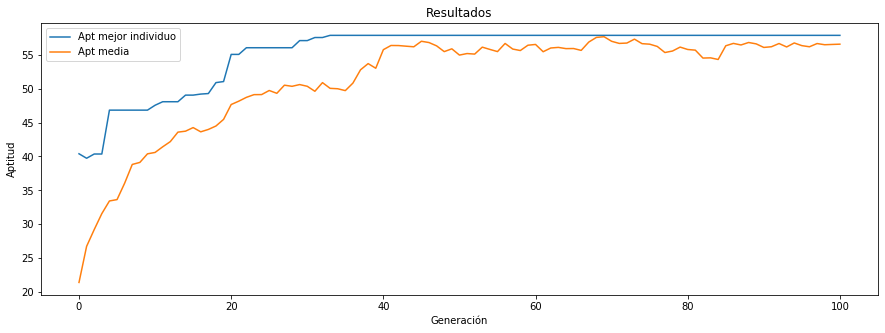

In [42]:
import matplotlib.pyplot as plt
import time
import numpy as np 
import random

res = []
t = []
epochs = 100
pe = 0.2
pm = 0.1
pc = 0.8
n = 50
mejor_apt = 0
mejor_solucion = None

t1 = time.time()
mejor_indiv = []    
mean_apt = []
g = generate_population(n, horas, equipos)

for epoch in range(epochs):
    rank = rank_generation(g)                           # Obtenemos una calificacion para cada individuo
    mejor_apt_i = list(rank.values())[0]                # Guardamos la apt el mejor individuo y la media de la generacion. 
    mejor_indiv.append(mejor_apt_i)
    mean_apt.append(np.mean(list(rank.values())))       
    if mejor_apt_i > mejor_apt:                         # Si la aptitud del mejor individuo es la mejor hasta el momento, lo guardamos 
        mejor_apt =  mejor_apt_i  
        mejor_solucion = g[list(rank.keys())[0]]     

    #print("Mejor individiuo:", mejor_indiv[-1])
    elit = elitism(g, rank, pe)                         # Aplicamos elitismo. Los individuos devueltos pasan directamente a la siguietne generacion
    size = len(g) -len(elit)
    g1 = selection(g, rank,size )                       # Aplicamos seleccion
    g1 = crossover(g1, pc)                              # Aplicamos crossover
    g1 = mutation(g1, pm)                               # Aplicamos mutacion
    g = g1 + elit                                       # Unimos la generacion obtenida con los individuos obtenidos en elitismo

rank = rank_generation(g)
mean_apt.append(np.mean(list(rank.values())))

mejor_indiv.append(list(rank.values())[0])
t2 = time.time()
print("Tiempo de ejecucion (s):", t2-t1)
print("Aptitud del mejor individuo:", max(mejor_indiv),"Generacion:",mejor_indiv.index(max(mejor_indiv)))
dibujar_resultado(mejor_indiv, mean_apt)
    


(*)Calcula la complejidad del algoritmo 

*Respuesta*

En un algoritmo genetico tenemos dos variables: 
- N: numero de individuos
- l: longitud de cada individuo. 
- G: numero de iteraciones del algoritmo

En el algortimo que he diseñado, cada uno de los operadores tiene la siguiente complejidad:
- Fitness: recorremos cada toda la poblacion y cada gen del individuo, por lo tanto tendria complejidad O(Nl)
- Seleccion: recorremos la poblacion entera, por lo tanto O(N)
- Crossover: recorremos la poblacion entera, y en el peor caso (que todos haya crossover en todos los individuo), cada gen del individuo, por lo tanto O(Nl)
- Mutacion: recorremos la pobalcion entera y, en el peor caso (que todos los individuos muten), cada gen del individuo, por lo tanto O(Nl).

Todo ello se ejecuta en G ocasiones, por lo que podemos deducir que la complejidad del algoritmo es O(GNl). Recordemos que en este problema, el valor l es siempre el mismo e igual a 10. Sin embargo, el parametro N y el parametros G si que podemos modificarlos para buscar la configuración que nos proporciones mejores soluciones.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

*Respuesta*

Vamos a generar unos datos de problema diferentes para probar el algoritmo. Por lo tanto, cambiaran las audiencias en función de la categoría (se sacaran valores aleatorios entre 0 y 3), los porcentajes de audiencia en funcion de la hora y de las coincidencias. Para estos dos ultimos, se sacarán valores aleatorios de entre 0 y 1.

In [0]:
 audiencia_max = {'AA': 0,
    'AB': 0,
    'AC': 0,
    'BB': 0,
    'BC': 0,
    'CC': 0}
    
for key in  audiencia_max.keys():
    audiencia_max[key] = round(random.random() + random.randint(0,2),2)
audiencia_percent = [random.random() for _ in range(10)]
coincidencias = [random.random() for _ in range(9)]

Aplica el algoritmo al juego de datos generado

Respuesta

Tiempo de ejecucion (s): 0.3030357360839844
Aptitud del mejor individuo: 201.06068069911487 Generacion: 44


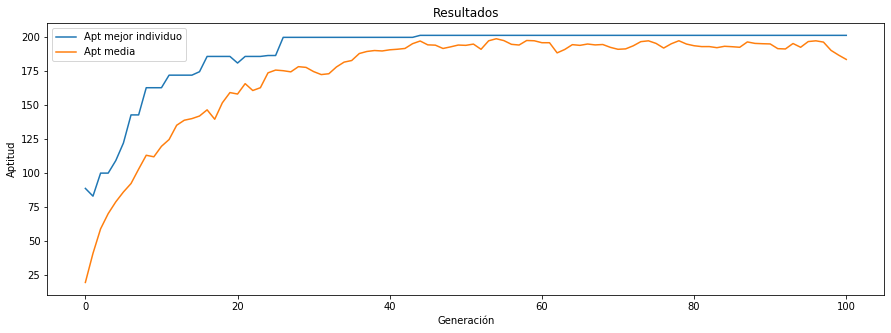

In [33]:
import matplotlib.pyplot as plt
import time
import numpy as np 
import random

res = []
t = []
epochs = 100
pe = 0.2
pm = 0.1
pc = 0.8
n = 50
mejor_apt = 0
mejor_solucion = None

t1 = time.time()
mejor_indiv = []    
mean_apt = []
g = generate_population(n, horas, equipos)

for epoch in range(epochs):
    rank = rank_generation(g)                           # Obtenemos una calificacion para cada individuo
    mejor_apt_i = list(rank.values())[0]                # Guardamos la apt el mejor individuo y la media de la generacion. 
    mejor_indiv.append(mejor_apt_i)
    mean_apt.append(np.mean(list(rank.values())))       
    if mejor_apt_i > mejor_apt:                         # Si la aptitud del mejor individuo es la mejor hasta el momento, lo guardamos 
        mejor_apt =  mejor_apt_i  
        mejor_solucion = g[list(rank.keys())[0]]     

    #print("Mejor individiuo:", mejor_indiv[-1])
    elit = elitism(g, rank, pe)                         # Aplicamos elitismo. Los individuos devueltos pasan directamente a la siguietne generacion
    size = len(g) -len(elit)
    g1 = selection(g, rank,size )                       # Aplicamos seleccion
    g1 = crossover(g1, pc)                              # Aplicamos crossover
    g1 = mutation(g1, pm)                               # Aplicamos mutacion
    g = g1 + elit                                       # Unimos la generacion obtenida con los individuos obtenidos en elitismo

rank = rank_generation(g)
mean_apt.append(np.mean(list(rank.values())))

mejor_indiv.append(list(rank.values())[0])
t2 = time.time()
print("Tiempo de ejecucion (s):", t2-t1)
print("Aptitud del mejor individuo:", max(mejor_indiv),"Generacion:",mejor_indiv.index(max(mejor_indiv)))
dibujar_resultado(mejor_indiv, mean_apt)
    

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

*Respuesta*

Resolver combinatoria: https://www.unirioja.es/talleres/creatividad_matematica/SeminarioBachillerato/Combinatoria_teoria.pdf


Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

*Respuesta*

La vía obvia para seguir el estudio de este problema sería generar el calendario completo de la liga, no solo una jornada. Sin embargo, me gustaría destacar que este problema lo podemos encontrar en numerosos campos. La generacion de un horario escolar en un colegio/insituto.. teniendo en cuenta que los profesores pueden dar más de una asignatura, a más de una clasa, y teniendo un recurso limitado de aulas puede ser un problema similar. En este caso no se buscaría maximizar un valor como la audiencia, si no ser capaces de generar soluciones que nos lleven a la válida. Debemos ser capaces de crear una funcion de aptitud que valores las soluciones teniendo en cuenta el potencial que tienen de convertirse en una solucion valida.